![alt text](/home/yt/datascience/The-circumplex.ppm.png "circumplex")

# Display Valence-Arousal and Fear and Audio

The Mediaeval 2017 Emotional Impact of Movies Task includes the data in the emotional domain 
( vallence - arousal  regression ) and  fear ( binary classification).We have display the valence and arousal of all the movies in the dataset.
Also the time of the movie where fear is present is specified with the value of the second.
According to the Russell's circmplex model we were expectinf the "FEAR" to be appeared in the negative vallence, positie arousal part of the circumflex.
However in some movies, we can see that frightment exists in positive valence and , negative arousal also.


In [5]:
import numpy as np
import pylab as pl
import re, fileinput
import os.path
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

In [7]:

# Input data
movieNames = ['After_The_Rain','Attitude_Matters','Barely_legal_stories','Between_Viewings','Big_Buck_Bunny','Chatter','Cloudland','Damaged_Kung_Fu','Decay','Elephant_s_Dream','First_Bite','Full_Service','Islands','Lesson_Learned','Norm','Nuclear_Family','On_time','Origami','Parafundit','Payload','Riding_The_Rails','Sintel','Spaceman','Superhero','Tears_of_Steel','The_room_of_franz_kafka','The_secret_number','To_Claire_From_Sonny','Wanted','You_Again']

med2017audiofolder='/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Audio_features/MEDIAEVAL17-DevSet-Audio_features/features/'
med2017annotationsFolder = '/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Valence_Arousal-annotations/MEDIAEVAL17-DevSet-Valence_Arousal-annotations/annotations/'
med2017fearFolder = '/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Fear-annotations/MEDIAEVAL17-DevSet-Fear-annotations/annotations/'


In [8]:
def getAnnotationDf(movname,folder):
    filename = os.path.join(folder, movname + '-MEDIAEVAL2017-valence_arousal.txt')
    annotation = np.genfromtxt(filename, names=True, delimiter='\t', dtype=None)
    df = pd.DataFrame(annotation)
    return df

def getFearDf(movname,folder):
    filename = os.path.join(folder, movname + '-MEDIAEVAL2017-fear.txt')
    annotation = np.genfromtxt(filename, names=True, delimiter='\t', dtype=None)
    df = pd.DataFrame(annotation)
    return df

In [24]:
import glob
files = glob.glob(med2017audiofolder+'After_The_Rain/*001.csv')
for file in files:
    print file

/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Audio_features/MEDIAEVAL17-DevSet-Audio_features/features/After_The_Rain/After_The_Rain_00001.csv


In [127]:
import glob
files = glob.glob(med2017audiofolder+'After_The_Rain'+'/*.csv')
files = sorted(files)
nname = []
aa = []
for file in files:     
    f=open(file, 'r')
    head= []
    for l in f :
        if '@attribute' in l:
            head.append(l.split()[1])
        elif l == '\n':
            l
        elif l[0] =='@':
            l
        else:
            aa.append(map(float,l.split(',')[1:]))
            nname.append(l.split(','))
    #print aa
    #print head
    #print '%s' % f.readlines()   
    f.close()

In [128]:
#sorted(files)


In [129]:
#pd.DataFrame(nname,columns=head).head()
pd.DataFrame(nname,columns=head).describe()

,name,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,...,shimmerLocal_sma_de_quartile3,shimmerLocal_sma_de_iqr1-2,shimmerLocal_sma_de_iqr2-3,shimmerLocal_sma_de_iqr1-3,shimmerLocal_sma_de_percentile99.0,shimmerLocal_sma_de_upleveltime75,shimmerLocal_sma_de_upleveltime90,F0final__Turn_numOnsets,F0final__Turn_duration,class
count,116,116,116,116,116,116,116,116,116,116,...,116,116,116,116,116,116,116,116,116,116
unique,1,110,108,116,116,116,116,116,116,116,...,116,116,116,116,116,109,97,56,2,1
top,'noname',6.582661e-01,0.000000e+00,4.400423e-01,1.021979e-04,8.869252e-01,1.540059e-01,3.290454e-02,4.688656e-02,4.534935e-01,...,1.591895e-02,1.524981e-02,1.527212e-02,3.333116e-02,6.208534e-02,2.500000e-01,1.250000e-01,4.200000e+01,9.940000e+00,0.0\n
freq,116,2,3,1,1,1,1,1,1,1,...,1,1,1,1,1,4,4,5,115,116


In [130]:
pd.DataFrame(aa,columns=head[1:]).head()

,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,...,shimmerLocal_sma_de_quartile3,shimmerLocal_sma_de_iqr1-2,shimmerLocal_sma_de_iqr2-3,shimmerLocal_sma_de_iqr1-3,shimmerLocal_sma_de_percentile99.0,shimmerLocal_sma_de_upleveltime75,shimmerLocal_sma_de_upleveltime90,F0final__Turn_numOnsets,F0final__Turn_duration,class
0,0.356926,0.000000,0.483179,-0.000777,0.867205,0.211693,0.082978,0.363643,0.687335,2.646904,...,0.028411,0.032738,0.025399,0.058137,0.090498,0.093750,0.015625,18.0,9.91,0.0
1,0.759073,0.341734,0.294483,0.000319,0.136645,0.175018,0.050916,0.243386,1.358245,5.053283,...,0.023211,0.024718,0.021596,0.046315,0.119109,0.039526,0.011858,42.0,9.94,0.0
2,0.255040,0.002016,0.609638,0.000859,0.184064,0.156870,0.043662,0.322730,0.083614,2.263823,...,0.038303,0.033905,0.038995,0.072900,0.148020,0.107345,0.028249,30.0,9.94,0.0
3,0.175403,0.087702,0.852588,0.000152,0.777042,0.161528,0.040587,0.206139,0.060393,2.812794,...,0.041516,0.040287,0.042655,0.082942,0.146380,0.138614,0.029703,18.0,9.94,0.0
4,0.718750,0.140121,0.906197,0.000039,0.886925,0.155277,0.038520,0.196582,0.136009,3.242689,...,0.033344,0.019298,0.043320,0.062617,0.121076,0.092593,0.055556,14.0,9.94,0.0


In [131]:

pd.DataFrame(aa,columns=head[1:]).describe()

,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,...,shimmerLocal_sma_de_quartile3,shimmerLocal_sma_de_iqr1-2,shimmerLocal_sma_de_iqr2-3,shimmerLocal_sma_de_iqr1-3,shimmerLocal_sma_de_percentile99.0,shimmerLocal_sma_de_upleveltime75,shimmerLocal_sma_de_upleveltime90,F0final__Turn_numOnsets,F0final__Turn_duration,class
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,...,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.0
mean,0.482629,0.476971,0.622502,0.000002,0.621686,0.149639,0.042864,0.204962,0.861638,4.748698,...,0.023377,0.023740,0.023554,0.047294,0.102969,0.091394,0.035742,27.405172,9.939741,0.0
std,0.299194,0.307959,0.268045,0.000216,0.289992,0.047981,0.023714,0.068350,0.582029,2.044677,...,0.010241,0.010693,0.011034,0.020473,0.039187,0.087003,0.050589,19.719326,0.002785,0.0
min,0.000000,0.000000,0.100873,-0.000777,0.038445,0.035316,0.001971,0.044944,-0.245752,2.263823,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.910000,0.0
25%,0.210938,0.209173,0.446124,-0.000070,0.430462,0.129989,0.028089,0.169106,0.393409,3.104958,...,0.016797,0.016467,0.015829,0.033534,0.080850,0.031203,0.007937,12.750000,9.940000,0.0
50%,0.455141,0.464718,0.570803,0.000011,0.606248,0.153842,0.039875,0.206336,0.749334,4.340809,...,0.021341,0.022529,0.021394,0.045285,0.103295,0.068437,0.019231,22.000000,9.940000,0.0
75%,0.762349,0.731855,0.901453,0.000085,0.901386,0.182164,0.057442,0.247498,1.222656,5.647927,...,0.030991,0.030394,0.031600,0.058140,0.132988,0.111158,0.039801,40.250000,9.940000,0.0
max,0.977823,0.998992,1.097546,0.000859,1.184386,0.251262,0.109596,0.363643,2.944254,14.584390,...,0.074808,0.074808,0.074808,0.149616,0.175577,0.500000,0.333333,78.000000,9.940000,0.0


In [53]:
len(aa[115])

1583

In [9]:
getFearDf('Big_Buck_Bunny',med2017fearFolder).head()

,Id,Time,Fear
0,0,0,0
1,1,5,0
2,2,10,0
3,3,15,0
4,4,20,0


In [10]:
getAnnotationDf('Big_Buck_Bunny',med2017annotationsFolder).head()

,Id,Time,MeanValence,MeanArousal
0,0,0,0.068617,-0.082473
1,1,5,0.107618,-0.116572
2,2,10,0.189917,-0.076415
3,3,15,0.294732,0.019456
4,4,20,0.393728,0.141223


In [11]:
x = getFearDf('After_The_Rain',med2017fearFolder)
len(x)

117

In [6]:
x = getFearDf('Big_Buck_Bunny',med2017fearFolder)
x.Fear.unique()

array([0, 1])

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data

def displayAV(moviename,df, feardf,col='b'):
    #plt.figure(figsize=(10,10))
    fig, ax = plt.subplots(figsize=(10,10))

    for i in range(len(df)):
        xy = (df.MeanValence[i], df.MeanArousal[i])
        ax.plot(xy[0], xy[1], "ob")
        # Annotate the 1st position with another text box ('Test')
        offsetbox = TextArea(str(df.Time[i]), minimumdescent=False)

        ab = AnnotationBbox(offsetbox, xy,
                        xybox=(-20, 40),
                        xycoords='data',
                        boxcoords="offset points",
                        arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=90,rad=3")
                    )

        fearlist = list(feardf[ feardf.Fear > 0 ]['Time'])
        if (df.Time[i] in fearlist):
            ax.add_artist(ab)
        # Fix the display limits to see everything
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.grid()
    plt.xlabel('Valence')
    plt.ylabel('Arousal')
    plt.title(moviename)
    # draw horizontal line
    plt.plot([-1, 1], [0, 0], 'k-', lw=2)

    # draw vertical line
    plt.plot([0,0], [-1, 1], 'k-', lw=2)

    plt.show()


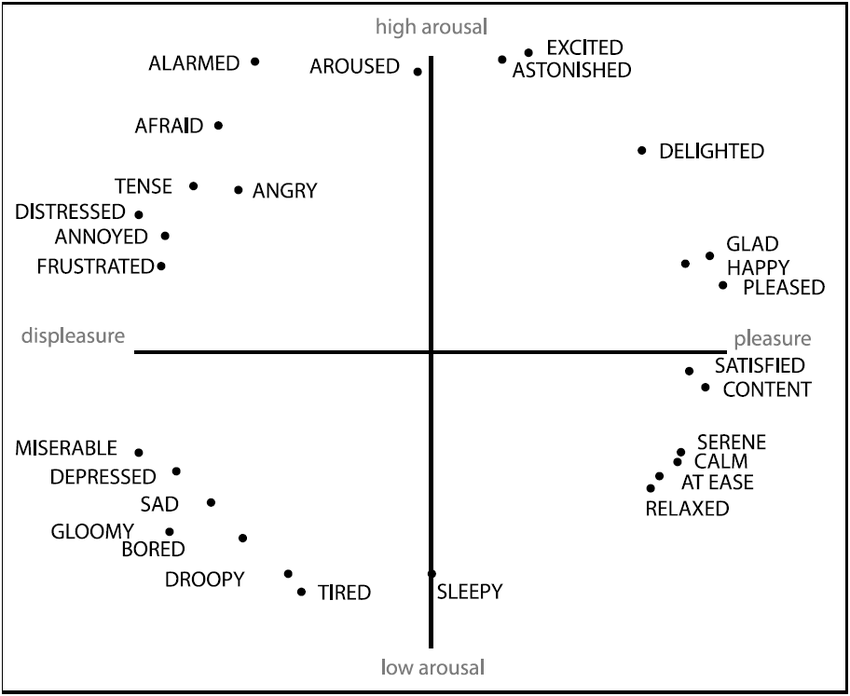

In [8]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "/home/yt/datascience/"
Image(filename = PATH + "The-circumplex.ppm.png", width=500, height=500)
#http://stackoverflow.com/questions/32370281/how-to-include-image-or-picture-in-jupyter-notebook
#Image(url= "https://www.researchgate.net/profile/Philippe_Zimmermann/publication/285895436/figure/fig1/AS:341962390556673@1458541595472/Figure-1-Two-dimensional-affective-space-defined-by-valence-and-arousal-The-circumplex.ppm")

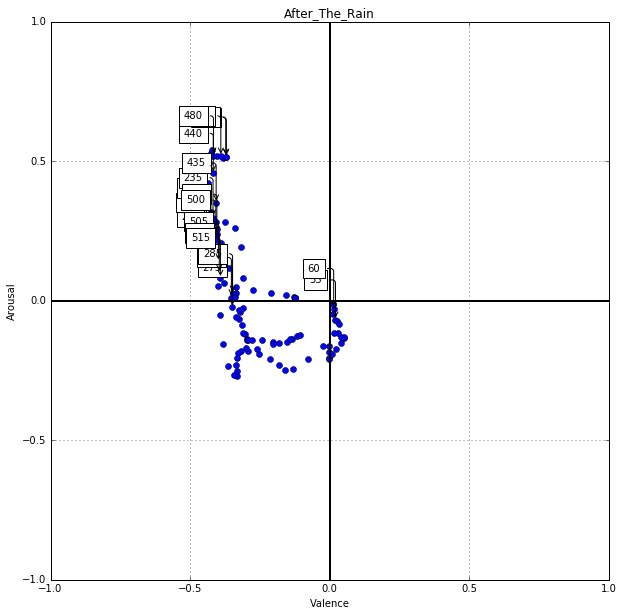

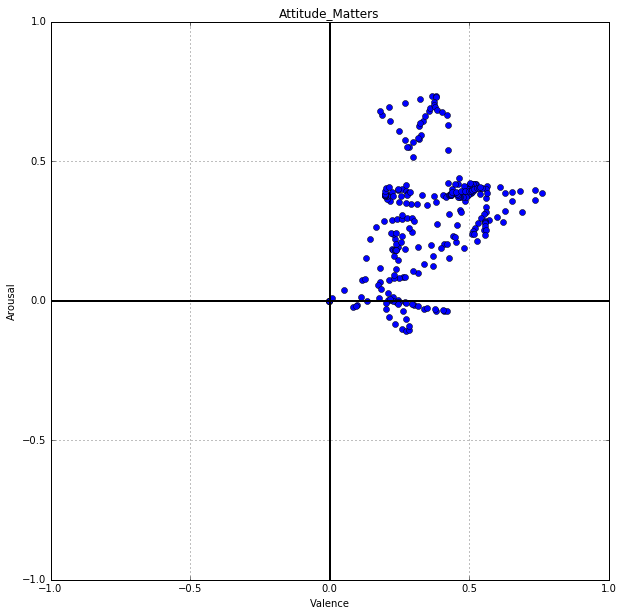

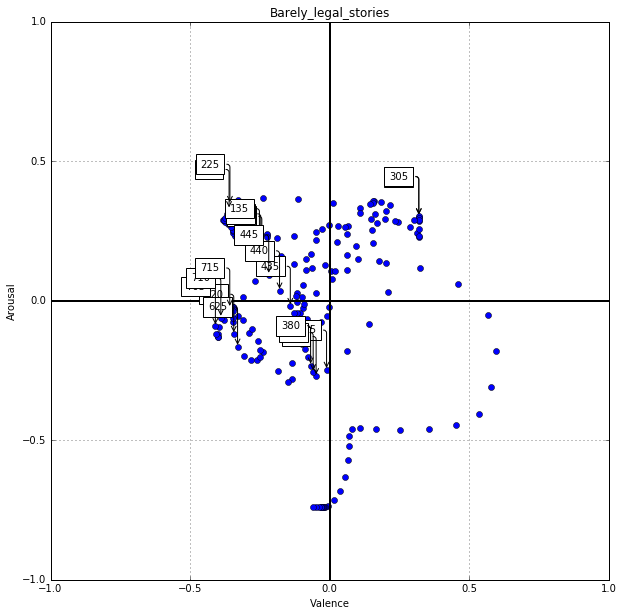

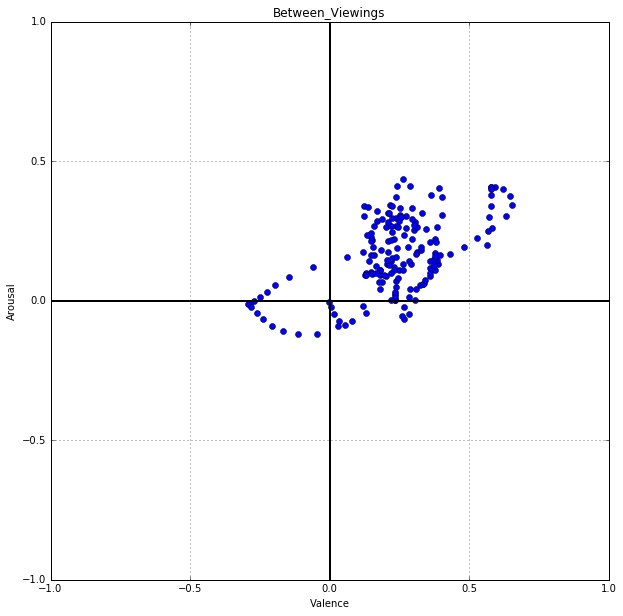

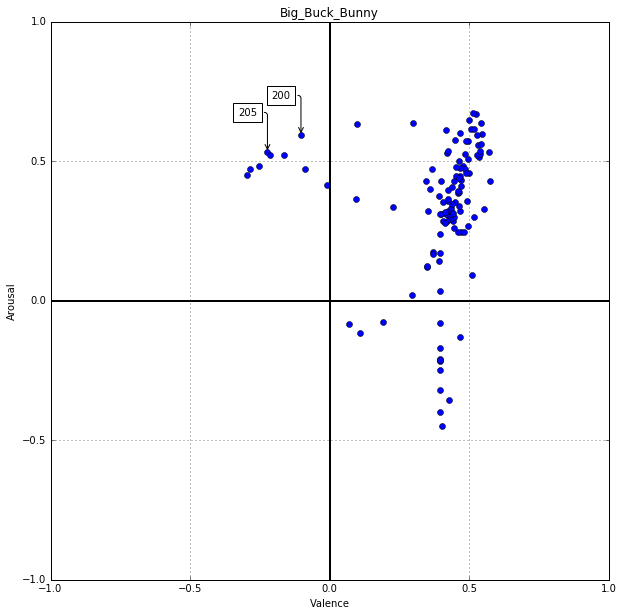

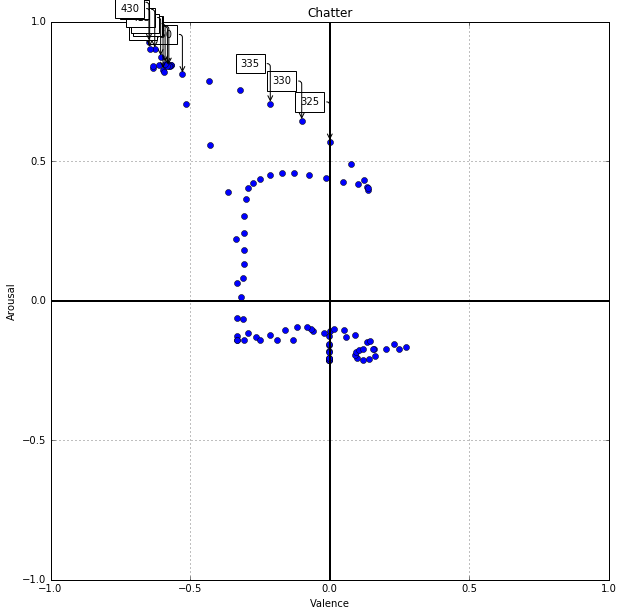

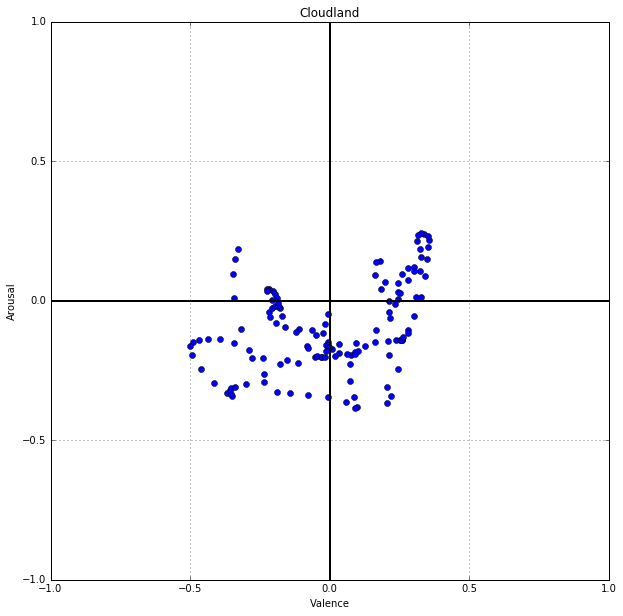

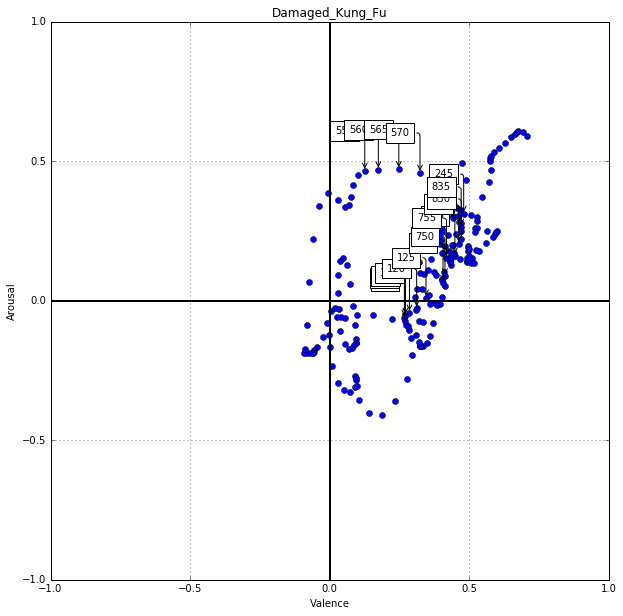

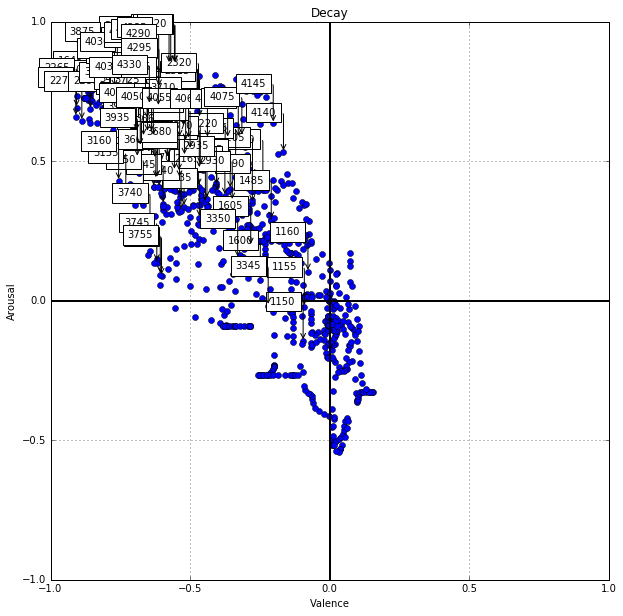

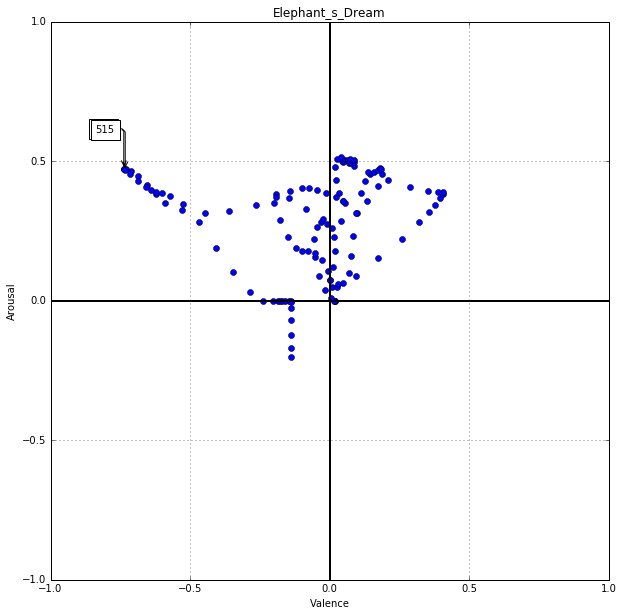

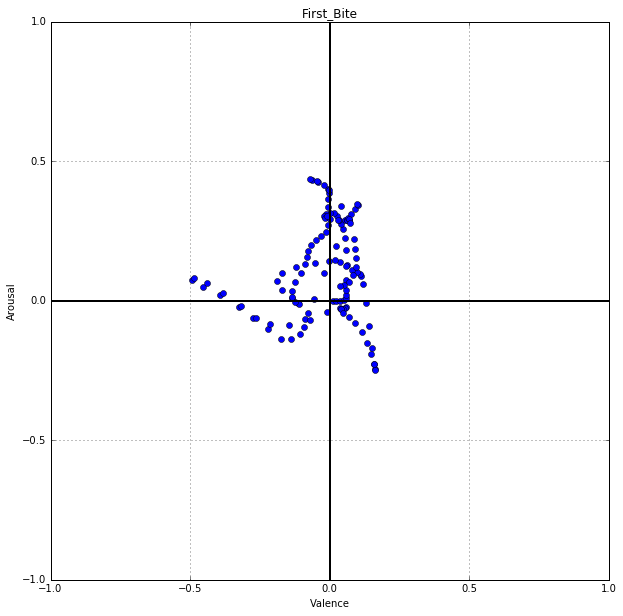

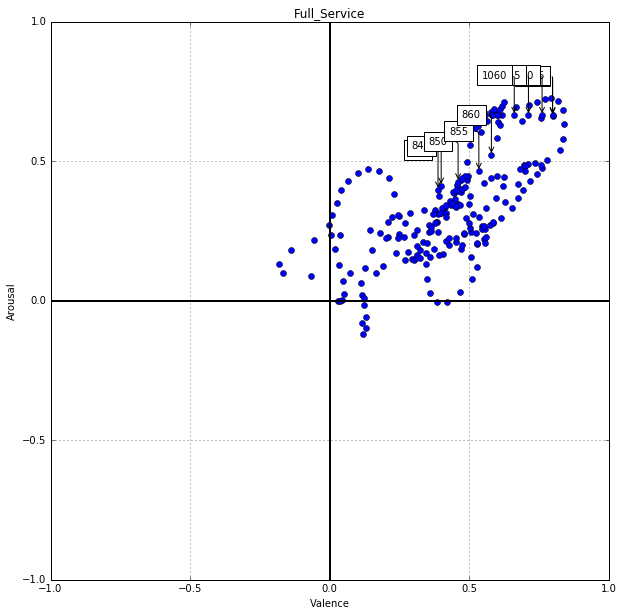

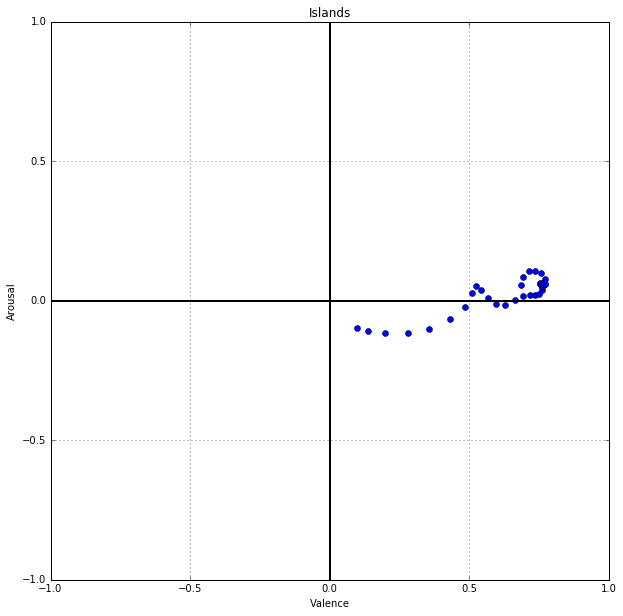

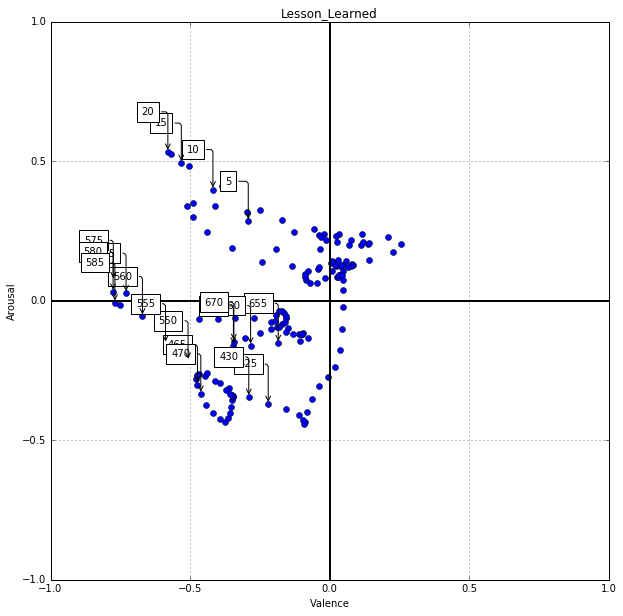

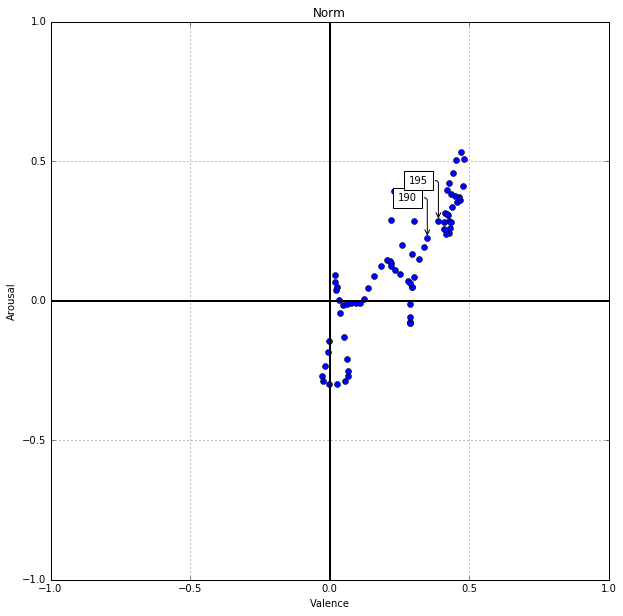

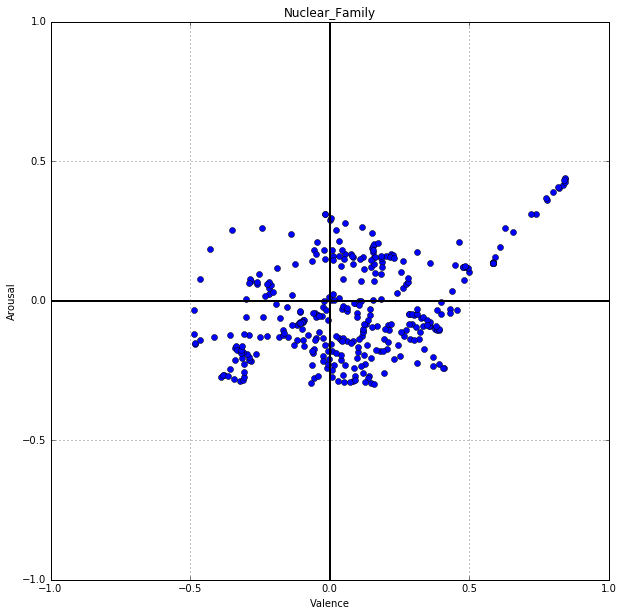

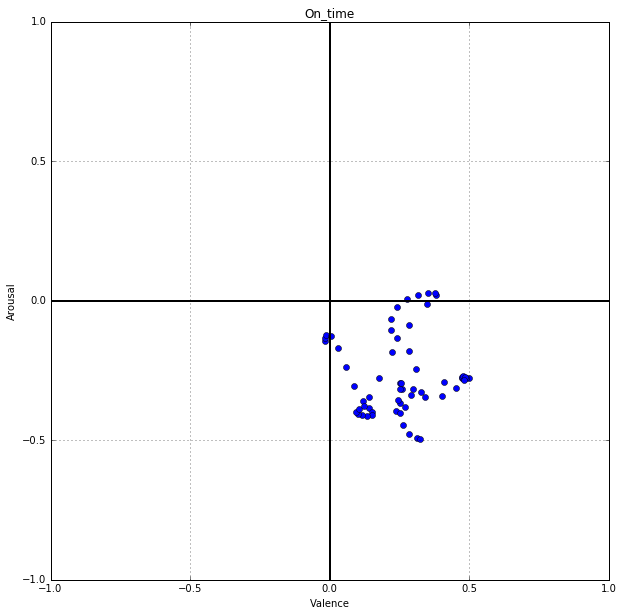

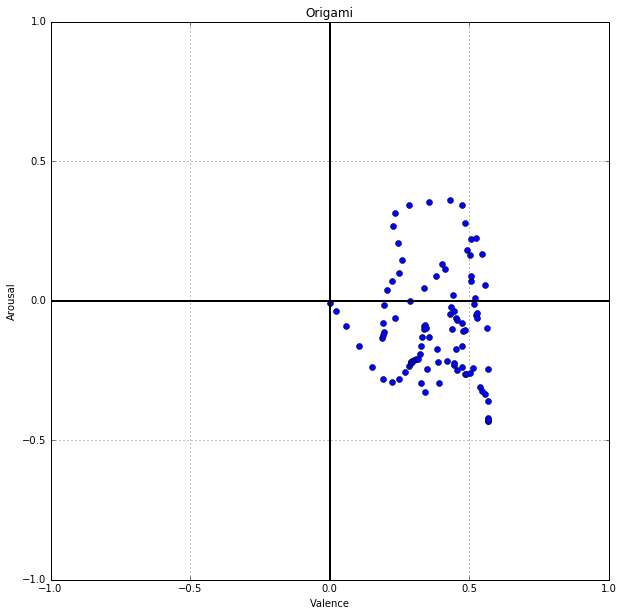

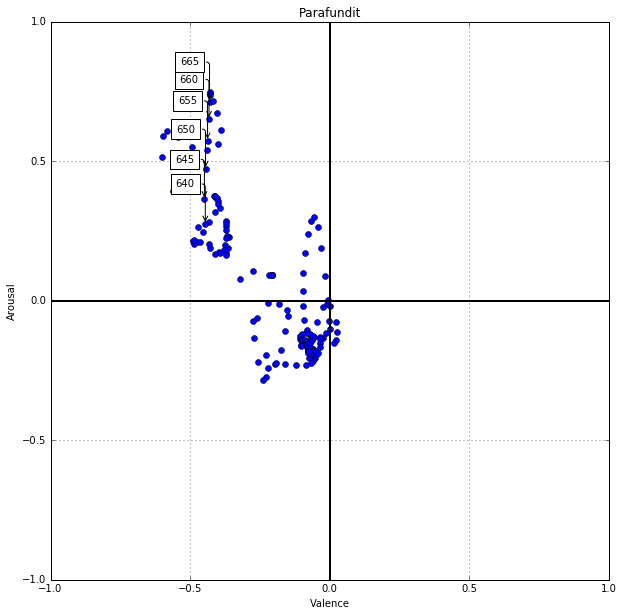

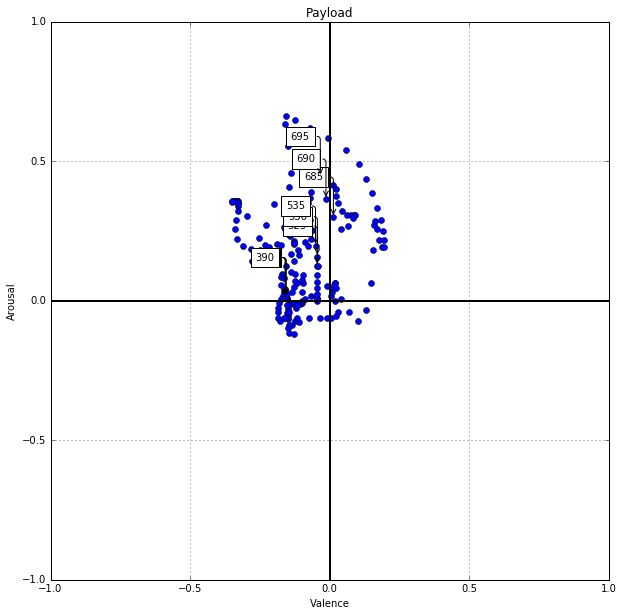

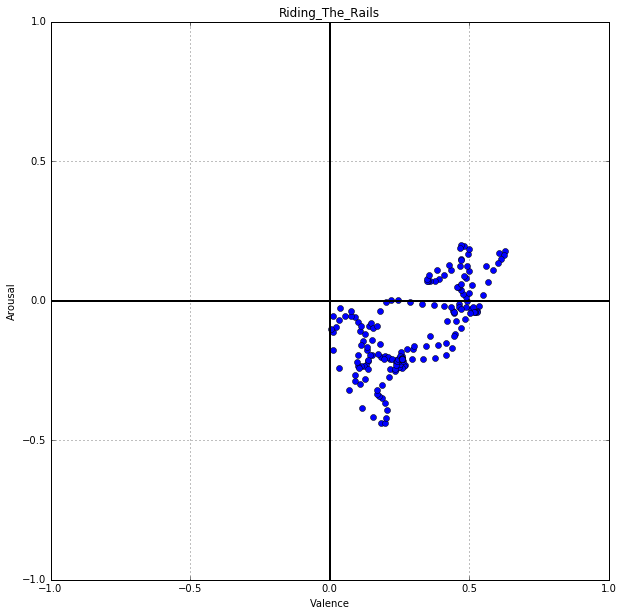

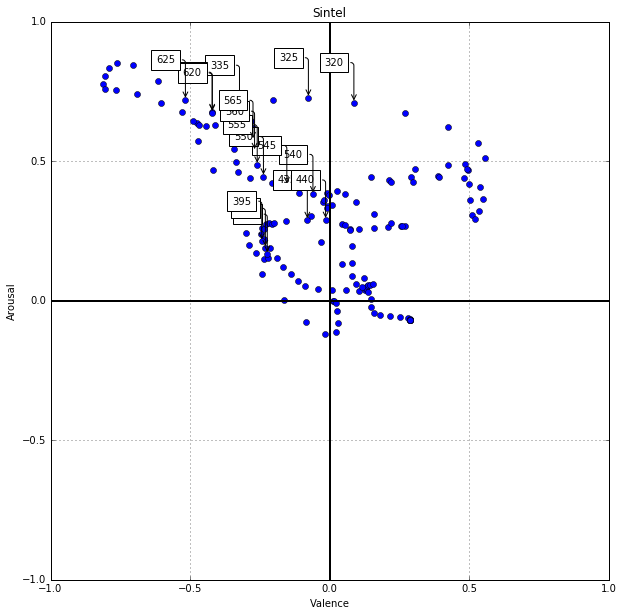

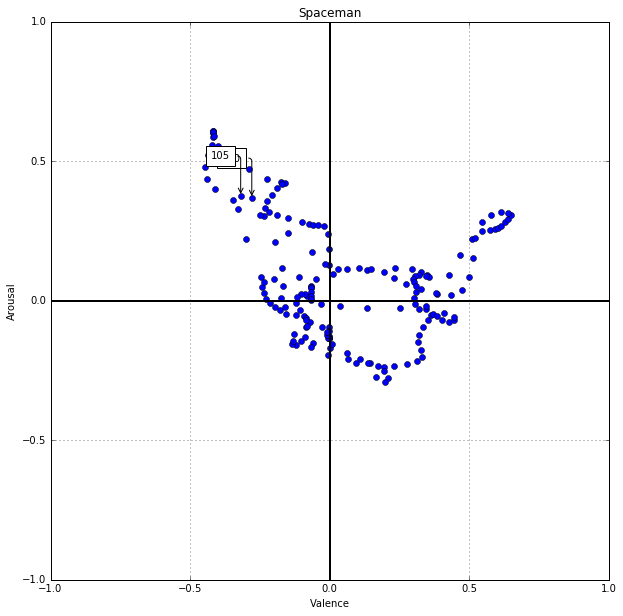

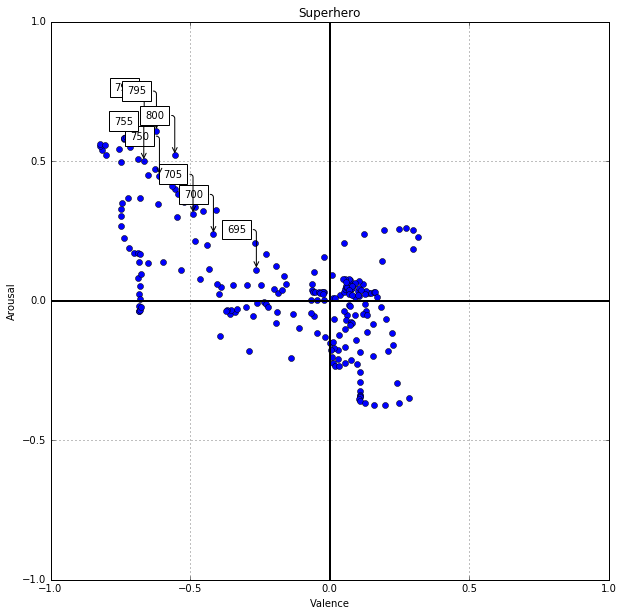

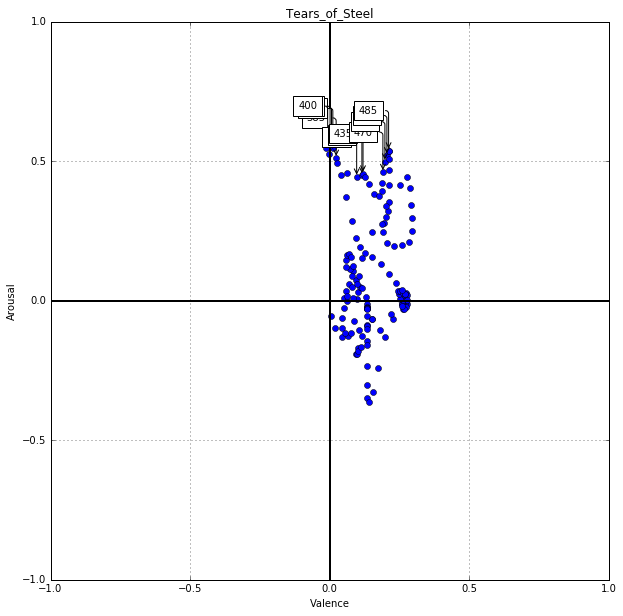

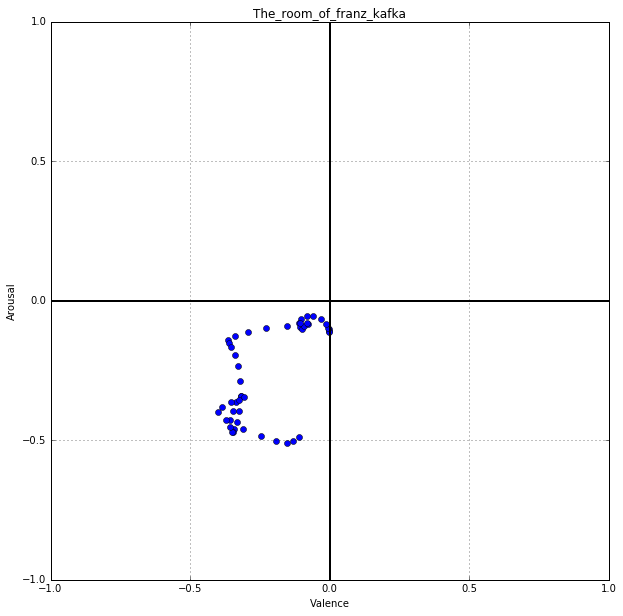

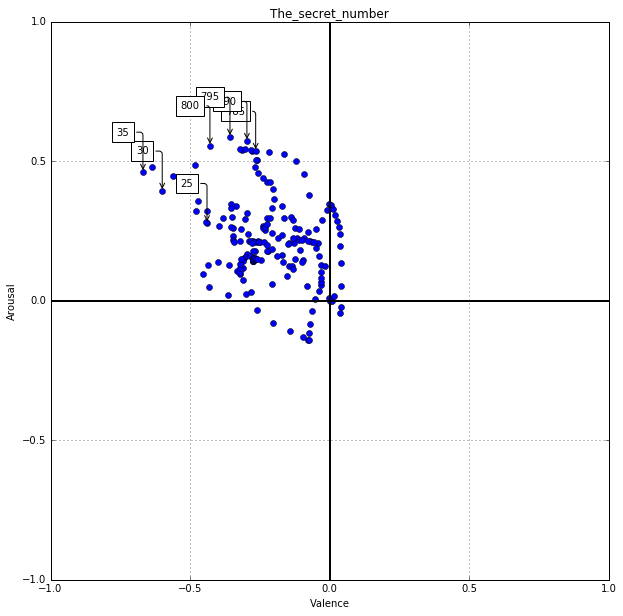

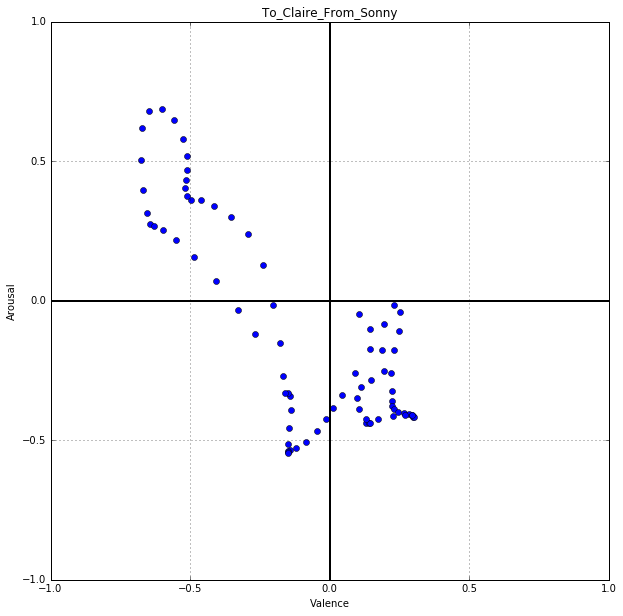

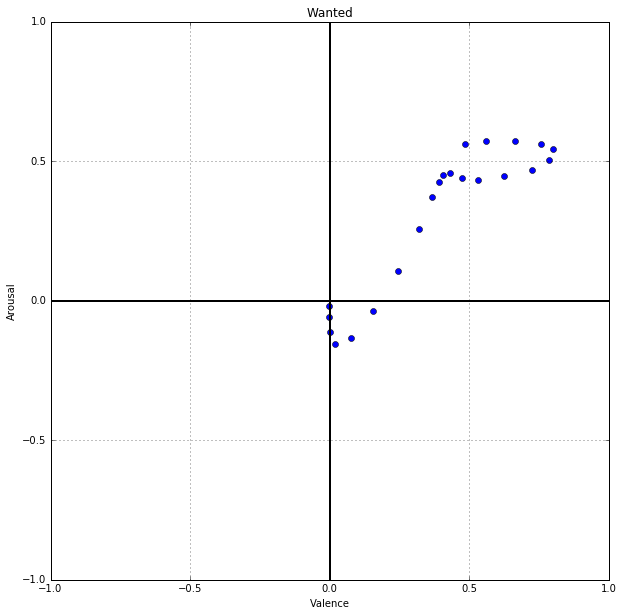

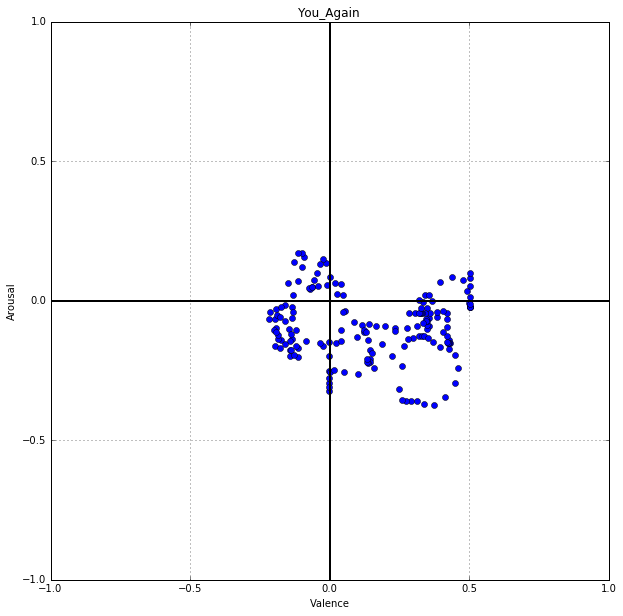

In [9]:
for moviename in movieNames:
    displayAV(moviename,getAnnotationDf(moviename,med2017annotationsFolder),getFearDf(moviename,med2017fearFolder))